In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10

## training set, validation set, testing set

In [2]:
train_set = pd.read_csv('train_set_V.csv')
valid_set = pd.read_csv('val_set_V.csv')
test_set = pd.read_csv('test_set_V.csv')


In [3]:
train_set.head()

,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,NATIONALITY_0,...,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET
0,0.121117,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.816647,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.714663,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.201953,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.150431,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = np.array(train_set['TARGET'])
x_train = np.array(train_set.drop(['TARGET'], axis=1))

y_val = np.array(valid_set['TARGET'])
x_val = np.array(valid_set.drop(['TARGET'], axis=1))

y_test = np.array(test_set['TARGET'])
x_test = np.array(test_set.drop(['TARGET'], axis=1))

In [5]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(1075926, 202) (1075926,)
(358642, 202) (358642,)
(358643, 202) (358643,)


# Logistic regression

n=10

C_arr = np.linspace(-6, 4, n)
train_accuracy = np.zeros(n)
val_accuracy = np.zeros(n)

for ind, C in enumerate(C_arr):    
    print(ind)
    logreg = LogisticRegression(solver='newton-cg', C=10**C)
    logreg.fit(x_train, y_train)

    
    # Evaluate train & test performance
    output = logreg.predict(x_train)
    target = y_train
    train_accuracy[ind] =sum(output == target)/ len(target)

    output = logreg.predict(x_val)
    target = y_val
    val_accuracy[ind] =sum(output == target)/ len(target)

# Plotting
plt.figure(figsize=(18, 8))

plt.plot(C_arr, train_accuracy, 'bo-', label=r'accuracy training set', color="violet", alpha=0.6, linewidth=3)
plt.plot(C_arr, val_accuracy, 'bo-', label=r'accuracy val set', color="darkviolet", alpha=0.6, linewidth=3)

plt.xlabel('C value'); plt.ylabel(r'accuracy')
plt.title(r'Evaluate logistic regression with different C')
plt.legend(loc='best')
plt.grid()

# FINAL EVALUATION OF THE MODEL

In [6]:
C_best = -1

logreg = LogisticRegression(solver = 'newton-cg',C=10**C_best)
logreg.fit(x_train, y_train)
coefficients = logreg.coef_

print('Logistic Regression')

output = logreg.predict(x_train)
target = y_train
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on train set: {:.2f} %".format(accuracy*100))

output = logreg.predict(x_val)
target = y_val
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on validation set: {:.2f} %".format(accuracy*100))


output = logreg.predict(x_test)
target = y_test
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on testing set: {:.2f} %".format(accuracy*100))

Logistic Regression

Accuracy on train set: 85.84 %

Accuracy on validation set: 85.74 %

Accuracy on testing set: 85.79 %


## confusion matrix

recall: 0.3295773748723187
precision: 0.6972817828802972


Text(0.5, 68.37592263802742, 'Predicted label')

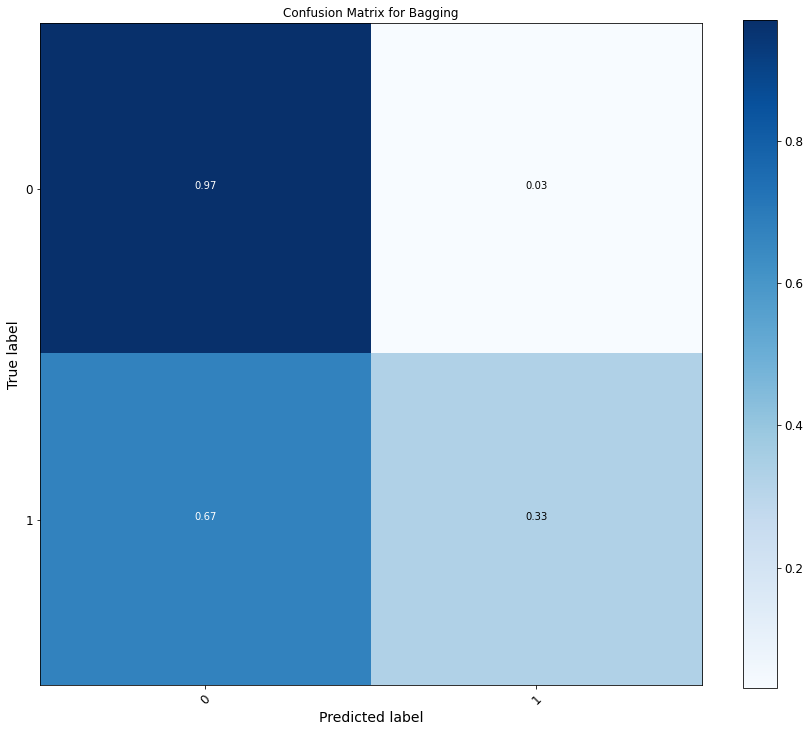

In [7]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix
import itertools


classes = [0,1]
y_true = y_test
y_pred = logreg.predict(x_test)
cm = confusion_matrix(y_true, y_pred, normalize ='true')


print("recall:", recall_score(y_true, y_pred ))
print("precision:", precision_score(y_true, y_pred ))

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix for Bagging")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3), horizontalalignment="center", color="white" if cm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label') 

In [8]:
print("recall:", recall_score(y_true, y_pred ))
print("precision:", precision_score(y_true, y_pred ))

recall: 0.3295773748723187
precision: 0.6972817828802972


### Check, what features have highest and lowest coefficients in logistic regression

In [9]:
features = list(train_set.columns)[:-1]

def get_most_correlated(coeffs, features, treshold):
    coeffs, features = zip(*sorted(zip( coeffs, features)))  

    for coef, feat in zip(coeffs, features):
        if abs(coef) > treshold:
            print("coef = {:.4f} \tfor\t {:}".format(coef, feat))
            
            
def get_least_correlated(coeffs, features, treshold):
    coeffs, features = zip(*sorted(zip( coeffs, features)))  ## sorting elements in (val, freq) indexing on 

    for coef, feat in zip(coeffs, features):
        if abs(coef) < treshold:
            print("coef = {:.4f} \tfor\t {:}".format(coef, feat))

## most important

In [10]:
print("Most correlated")
get_most_correlated(coefficients[0], features, 1)

Most correlated
coef = -2.4084 	for	 HAS_IP
coef = -1.7773 	for	 COMPANY_SIZE_NaN
coef = -1.3466 	for	 PPK_STAGE_4
coef = -1.3231 	for	 RATIO_IS_SUSPENDED_0.0
coef = -1.0622 	for	 HAS_AW
coef = 1.2723 	for	 PKD_GROUP_56
coef = 1.4650 	for	 COMPANY_TYPE_NaN
coef = 2.6196 	for	 RATIO_IS_SUSPENDED_1.0


In [11]:
print("Least correlated")
get_least_correlated(coefficients[0], features, 0.05)
get_least_correlated

Least correlated
coef = -0.0470 	for	 PKD_GROUP_38
coef = -0.0465 	for	 COMPANY_TYPE_18.0
coef = -0.0419 	for	 PKD_GROUP_52
coef = -0.0417 	for	 NATIONALITY_114
coef = -0.0338 	for	 PPK_BANK_20
coef = -0.0309 	for	 COMPANY_TYPE_3.0
coef = -0.0288 	for	 PKD_GROUP_72
coef = -0.0278 	for	 PKD_GROUP_37
coef = -0.0254 	for	 PPK_BANK_2
coef = -0.0241 	for	 COMPANY_TYPE_9.0
coef = -0.0234 	for	 COMPANY_TYPE_25.0
coef = -0.0189 	for	 PKD_GROUP_57
coef = -0.0185 	for	 PKD_GROUP_62
coef = -0.0054 	for	 NATIONALITY_49
coef = 0.0035 	for	 PPK_BANK_18
coef = 0.0036 	for	 PKD_GROUP_96
coef = 0.0052 	for	 NATIONALITY_0
coef = 0.0078 	for	 PPK_BANK_9
coef = 0.0089 	for	 PKD_GROUP_71
coef = 0.0104 	for	 SEX_N
coef = 0.0112 	for	 PKD_GROUP_0.
coef = 0.0137 	for	 PKD_GROUP_30
coef = 0.0183 	for	 PPK_BANK_14
coef = 0.0186 	for	 PKD_GROUP_49
coef = 0.0210 	for	 AGE
coef = 0.0220 	for	 PKD_GROUP_na
coef = 0.0250 	for	 PKD_GROUP_39
coef = 0.0281 	for	 COMPANY_TYPE_5.0
coef = 0.0300 	for	 PKD_GROUP_80
coef = 

<function __main__.get_least_correlated(coeffs, features, treshold)>